# QRT ENS Data Challenge 2023 - Context

Contexte

Une multitude de facteurs influencent le prix de l'electricité au quotidien. Des variations locales du climat pourront à la fois affecter la production et la demande électrique par exemple. Des phénomènes à plus long terme, comme le réchauffement climatique, auront également un impact évident. Des évènements géopolitiques, comme la guerre en Ukraine, peuvent en parallèle faire bouger le prix des matières premières qui sont clefs dans la production d'électricité, sachant que chaque pays s'appuie sur un mix énergétique qui lui est propre (nucléaire, solaire, hydrolique, gaz, charbon, etc). De plus chaque pays peut importer/exporter de l'électricité avec ses voisins au travers de marchés dynamiques, comme en Europe. Ces différents élements rendent assez complexe la modélisation du prix de l'électricité par pays.

But

L'objectif est de modéliser le prix l'électricité à partir de données météorologiques, énergétiques (matières premières) et commerciales pour deux pays européens - la France et l'Allemagne. On soulignera que c'est ici un problème d'explication des prix par d'autres variables concomitantes et non pas un problème de prédiction.

Plus précisément le but est de construire un modèle qui, à partir de ces variables explicatives, renvoie une bonne estimation de la variation journalière du prix de contrats à terme (dits futures) sur l'électricité, en France ou en Allemagne. Ces contrats permettent d'acheter (ou de vendre) une quantité donnée d'électricité à un prix fixé par le contrat et qui sera livrée à une date future spécifiée (maturité du contrat). Les futures sont donc des instruments financiers qui donnent une estimation de la valeur de l'électricité au moment de la maturité du contrat à partir des conditions actuelles du marché - ici, on se restreint à des futures à courte maturité (24h). Soulignons que l'échange de futures sur l'electricité est un marché dynamique en Europe.

Concernant les variables explicatives, les participants auront accès pour chaque pays à des mesures journalières de données météorologiques (température, quantité de pluie et force du vent), de production énergétique (variations des prix de différentes matières premières / énergies) et d'utilisation de l'électricité (consommation, échanges entre ces deux pays, import-export avec le reste de l'Europe).

La fonction de score (métrique) utilisée est la corrélation de Spearman entre la réponse du participant et les variations réelles du prix des futures contenues dans le jeu de données de test.

N'hésitez pas à consulter notre forum dédié et notre page LinkedIn pour plus d'information sur le challenge et sur QRT.

Description des données

Trois jeux de données sont fournis au format csv : les données d'entrainement en entrée X_train et en sortie Y_train, et les données test en entrée X_test.

NB : Les données d'entrée X_train et X_test représentent les même variables explicatives mais sur deux périodes de temps différentes.

La colonne ID de X_train et Y_train est identique, et de même pour les données test. Les données d'entrainement fournissent 1494 lignes, et les données de test en contiennent 654.

Les données d'entrée possèdent 35 colonnes :

ID : Identifiant d'indexe unique, associé à un jour (DAY_ID) et un pays (COUNTRY),
DAY_ID : Identifiant du jour - les dates ont été annonymisées en préservant la structure des données,
COUNTRY : Identifiant du pays - DE = Allemagne, FR = France,

et composées ensuite de variations journalières du prix de matières premières,

GAS_RET : Gaz en Europe,
COAL_RET : Charbon en Europe,
CARBON_RET : Futures sur les emissions carbone,

de mesures météorologiques (journalières, dans le pays x),

x_TEMP : Temperature,
x_RAIN : Pluie,
x_WIND : Vent,

de mesures de productions d'energie (journalière, dans le pays x),

x_GAS : Gaz naturel,
x_COAL : Charbon,
x_HYDRO : Hydrolique,
x_NUCLEAR : Nucléaire,
x_SOLAR : Photovoltaïque,
x_WINDPOW : Eolienne,
x_LIGNITE : Lignite,

et de mesures d'utilisation électrique (journalières, dans le pays x),

x_CONSUMPTON : Electricité totale consommée,
x_RESIDUAL_LOAD : Electricité consommée après utilisation des énergies renouvelables,
x_NET_IMPORT: Electricité importée depuis l'Europe,
x_NET_EXPORT: Electricité exportée vers l'Europe,
DE_FR_EXCHANGE: Electricité échangée entre Allemagne et France,
FR_DE_EXCHANGE: Electricité échangée entre France et Allemagne.

Les données en sortie se composent de deux colonnes :

ID : Identifiant unique - le même que celui des données d'entrée,
TARGET : Variation journalière du prix de futures d'électricité (maturité 24h).

Les solutions envoyées par les participants devront être structurées comme les données en sortie, à savoir un fichier au format csv avec deux colonnes ID and TARGET, avec comme valeurs ID les valeurs correspondantes à la colonne ID de X_test. Un exemple de fichier contenant une solution aléatoire est fourni - Cf. aussi le notebook fourni en materiel supplémentaire.

Description du benchmark

Le benchmark pour ce challenge consiste en une simple régression linéaire, après un léger nettoyage des données : les valeurs manquantes (NaN) ont été remplacées par des zéros et la colonne COUNTRY a été supprimée - en d'autres termes, nous avons utilisé un modèle identique pour la France et l'Allemagne.

Le score public obtenu pour ce benchmark est de 15.86%. Un notebook contenant la génération du benchmark et quelques discussions est disponible en "supplementary files" que vous trouverez sur cette page (colonne de droite).

## Libraries

In [182]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')
X_test = pd.read_csv('X_test.csv')

X_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


# Data processing / Handling missing values

In [219]:


X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')
X_test = pd.read_csv('X_test.csv')

# Create a time series based on DAY_ID to use for interpolation
X_train_sorted = X_train.sort_values(['COUNTRY', 'DAY_ID'])
X_test_sorted = X_test.sort_values(['COUNTRY', 'DAY_ID'])

# Interpolate missing values using polynomial interpolation for each country
X_train_interpolated = X_train.copy()
X_test_interpolated = X_test.copy()

# Get numeric columns for interpolation
numeric_cols = X_train.columns[3:]

# Interpolate by country using polynomial interpolation
for country in ['DE', 'FR']:
    # Create masks for each country
    train_mask = X_train['COUNTRY'] == country
    test_mask = X_test['COUNTRY'] == country
    
    # For training data - interpolate by polynomial degree 3 where possible
    for col in numeric_cols:
        # Sort by DAY_ID for proper interpolation
        temp_df = X_train_sorted[train_mask].copy()
        # Apply polynomial interpolation
        X_train_interpolated.loc[train_mask, col] = temp_df[col].interpolate(
            method='polynomial', order=3, limit_direction='both'
        )
    
    # For test data - interpolate by polynomial degree 3 where possible
    for col in numeric_cols:
        # Sort by DAY_ID for proper interpolation
        temp_df = X_test_sorted[test_mask].copy()
        # Apply polynomial interpolation
        X_test_interpolated.loc[test_mask, col] = temp_df[col].interpolate(
            method='polynomial', order=3, limit_direction='both'
        )

# Fill any remaining NaN values with 0
X_train_interpolated = X_train_interpolated.fillna(0)
X_test_interpolated = X_test_interpolated.fillna(0)

# Update X_train and X_test with the interpolated values
X_train = X_train_interpolated
X_test = X_test_interpolated


# Create a Spearman correlation scorer
def spearman_score(y_true, y_pred):
    return spearmanr(y_true, y_pred)[0]

spearman_scorer = make_scorer(spearman_score)






# Verify imputation
print("\nRemaining missing values in X_train after imputation:")
print(X_train.isna().sum())
print("\nRemaining missing values in X_test after imputation:")
print(X_test.isna().sum())


Remaining missing values in X_train after imputation:
ID                  0
DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      0
DE_FR_EXCHANGE      0
FR_DE_EXCHANGE      0
DE_NET_EXPORT       0
FR_NET_EXPORT       0
DE_NET_IMPORT       0
FR_NET_IMPORT       0
DE_GAS              0
FR_GAS              0
DE_COAL             0
FR_COAL             0
DE_HYDRO            0
FR_HYDRO            0
DE_NUCLEAR          0
FR_NUCLEAR          0
DE_SOLAR            0
FR_SOLAR            0
DE_WINDPOW          0
FR_WINDPOW          0
DE_LIGNITE          0
DE_RESIDUAL_LOAD    0
FR_RESIDUAL_LOAD    0
DE_RAIN             0
FR_RAIN             0
DE_WIND             0
FR_WIND             0
DE_TEMP             0
FR_TEMP             0
GAS_RET             0
COAL_RET            0
CARBON_RET          0
dtype: int64

Remaining missing values in X_test after imputation:
ID                  0
DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      

C:\Users\thoma\AppData\Local\Temp\ipykernel_24288\664800710.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_24288\664800710.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_24288\664800710.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_24288\664800710.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_24288\664800710.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_24288\66480

# Features Engineering

In [263]:
from sklearn.cluster import KMeans



X_train_prep = X_train.copy()
X_test_prep = X_test.copy()

# Create dummy variables for COUNTRY
encoder = OneHotEncoder(sparse=False, drop='first', categories=[['FR', 'DE']])
country_encoded_train = encoder.fit_transform(X_train_prep[['COUNTRY']])
country_encoded_test = encoder.transform(X_test_prep[['COUNTRY']])

# Drop non-feature columns and add encoded country
X_train_features = X_train_prep.drop(['ID', 'DAY_ID', 'COUNTRY'], axis=1)
# X_train_features = X_train_prep.drop(['ID', 'DAY_ID'], axis=1)
X_test_features = X_test_prep.drop(['ID', 'DAY_ID', 'COUNTRY'], axis=1)


# Add the encoded country column (only DE since FR is the reference)
X_train_features['COUNTRY_DE'] = country_encoded_train
X_test_features['COUNTRY_DE'] = country_encoded_test

# Get target values
y_train = Y_train['TARGET']


X_train_features['DE_WIND_SOLAR'] = X_train_features['DE_WINDPOW'] * X_train_features['DE_SOLAR']
X_test_features['DE_WIND_SOLAR'] = X_test_features['DE_WINDPOW'] * X_test_features['DE_SOLAR']

X_train_features['FR_WIND_SOLAR'] = X_train_features['FR_WINDPOW'] * X_train_features['FR_SOLAR']
X_test_features['FR_WIND_SOLAR'] = X_test_features['FR_WINDPOW'] * X_test_features['FR_SOLAR']

# Squared terms for important variables
X_train_features['DE_RESIDUAL_LOAD_SQ'] = X_train_features['DE_RESIDUAL_LOAD']**2
X_test_features['DE_RESIDUAL_LOAD_SQ'] = X_test_features['DE_RESIDUAL_LOAD']**2

X_train_features['FR_RESIDUAL_LOAD_SQ'] = X_train_features['FR_RESIDUAL_LOAD']**2
X_test_features['FR_RESIDUAL_LOAD_SQ'] = X_test_features['FR_RESIDUAL_LOAD']**2


# Create ratios between important features
X_train_features['DE_WIND_CONSUMPTION_RATIO'] = X_train_features['DE_WINDPOW'] / (X_train_features['DE_CONSUMPTION'] + 0.001)
X_test_features['DE_WIND_CONSUMPTION_RATIO'] = X_test_features['DE_WINDPOW'] / (X_test_features['DE_CONSUMPTION'] + 0.001)

X_train_features['FR_WIND_CONSUMPTION_RATIO'] = X_train_features['FR_WINDPOW'] / (X_train_features['FR_CONSUMPTION'] + 0.001)
X_test_features['FR_WIND_CONSUMPTION_RATIO'] = X_test_features['FR_WINDPOW'] / (X_test_features['FR_CONSUMPTION'] + 0.001)

X_train_features['DE_SOLAR_CONSUMPTION_RATIO'] = X_train_features['DE_SOLAR'] / (X_train_features['DE_CONSUMPTION'] + 0.001)
X_test_features['DE_SOLAR_CONSUMPTION_RATIO'] = X_test_features['DE_SOLAR'] / (X_test_features['DE_CONSUMPTION'] + 0.001)

X_train_features['FR_SOLAR_CONSUMPTION_RATIO'] = X_train_features['FR_SOLAR'] / (X_train_features['FR_CONSUMPTION'] + 0.001)
X_test_features['FR_SOLAR_CONSUMPTION_RATIO'] = X_test_features['FR_SOLAR'] / (X_test_features['FR_CONSUMPTION'] + 0.001)








# Create temperature clusters for both countries (3 clusters: cold, moderate, hot)

# Create temperature data for clustering
temp_data_train = X_train_features[['FR_TEMP']].copy()
temp_data_test = X_test_features[['FR_TEMP']].copy()

# Fit KMeans on training data
kmeans = KMeans(n_clusters=10, random_state=1)
temp_clusters_train = kmeans.fit_predict(temp_data_train)
temp_clusters_test = kmeans.predict(temp_data_test)

# Add cluster assignments as one-hot encoded features
for i in range(10):
    X_train_features[f'TEMP_CLUSTER_{i}'] = (temp_clusters_train == i).astype(int)
    X_test_features[f'TEMP_CLUSTER_{i}'] = (temp_clusters_test == i).astype(int)








# Print the shape of our new feature sets
print(f"Training features shape after engineering: {X_train_features.shape}")
print(f"Test features shape after engineering: {X_test_features.shape}")
print(f"Added {X_train_features.shape[1] - 33} new features")

# Get correlation with target for new features
feature_correlations = {}
for col in X_train_features.columns:
    if col not in feature_names:  # Only look at new features
        corr = spearmanr(X_train_features[col], y_train)[0]
        feature_correlations[col] = corr

# Sort and print top correlations
top_correlations = sorted(feature_correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print("\nTop 10 new features by correlation with target:")
for feature, corr in top_correlations[:10]:
    print(f"{feature}: {corr:.4f}")



X_train_features.head()

c:\Users\thoma\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\thoma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\thoma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Training features shape after engineering: (1494, 51)
Test features shape after engineering: (654, 51)
Added 18 new features

Top 10 new features by correlation with target:
TEMP_CLUSTER_2: -0.0515
TEMP_CLUSTER_0: 0.0416
TEMP_CLUSTER_9: -0.0339
TEMP_CLUSTER_1: 0.0196
TEMP_CLUSTER_4: 0.0120
TEMP_CLUSTER_6: -0.0083
TEMP_CLUSTER_8: 0.0074
TEMP_CLUSTER_3: 0.0055
TEMP_CLUSTER_7: -0.0024
TEMP_CLUSTER_5: -0.0003


,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,TEMP_CLUSTER_0,TEMP_CLUSTER_1,TEMP_CLUSTER_2,TEMP_CLUSTER_3,TEMP_CLUSTER_4,TEMP_CLUSTER_5,TEMP_CLUSTER_6,TEMP_CLUSTER_7,TEMP_CLUSTER_8,TEMP_CLUSTER_9
0,0.210099,-0.427458,-0.606523,0.606523,0.000000,0.692860,0.000000,-0.692860,0.441238,-0.213766,...,0,0,0,0,1,0,0,0,0,0
1,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,0.174773,0.426940,...,0,0,0,0,0,0,0,0,1,0
2,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,2.351913,2.122241,...,0,1,0,0,0,0,0,0,0,0
3,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,0.487818,0.194659,...,0,0,0,0,1,0,0,0,0,0
4,0.143807,-0.617038,-0.924990,0.924990,-1.600892,0.990324,1.600892,-0.990324,0.238693,-0.240862,...,0,0,0,0,0,1,0,0,0,0


# Specify Country

In [ ]:
# # Filter data for just the country Germany (DE)
# # Create masks for Germany
# DE_mask = X_train_features['COUNTRY_DE'] == 1


# # german_indices = X_train_features[DE_mask].index

# # Create filtered dataframes
# X_train_features = X_train_features[DE_mask.values]
# y_train = y_train[DE_mask.values]

# # y_train = Y_train.loc[Y_train['ID'].isin(X_train['ID'][german_indices]), 'TARGET']

# y_train.describe()

count    643.000000
mean       0.148044
std        1.047022
min       -3.075929
25%       -0.324693
50%        0.005057
75%        0.386596
max        7.138604
Name: TARGET, dtype: float64

# Regression Lasso/ridge

c:\Users\thoma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.172e-02, tolerance: 5.748e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\thoma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\thoma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\thoma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputW

Best Lasso alpha: 0.01
Best Lasso cross-validation score: 0.3593
Best Ridge alpha: 100
Best Ridge cross-validation score: 0.3571


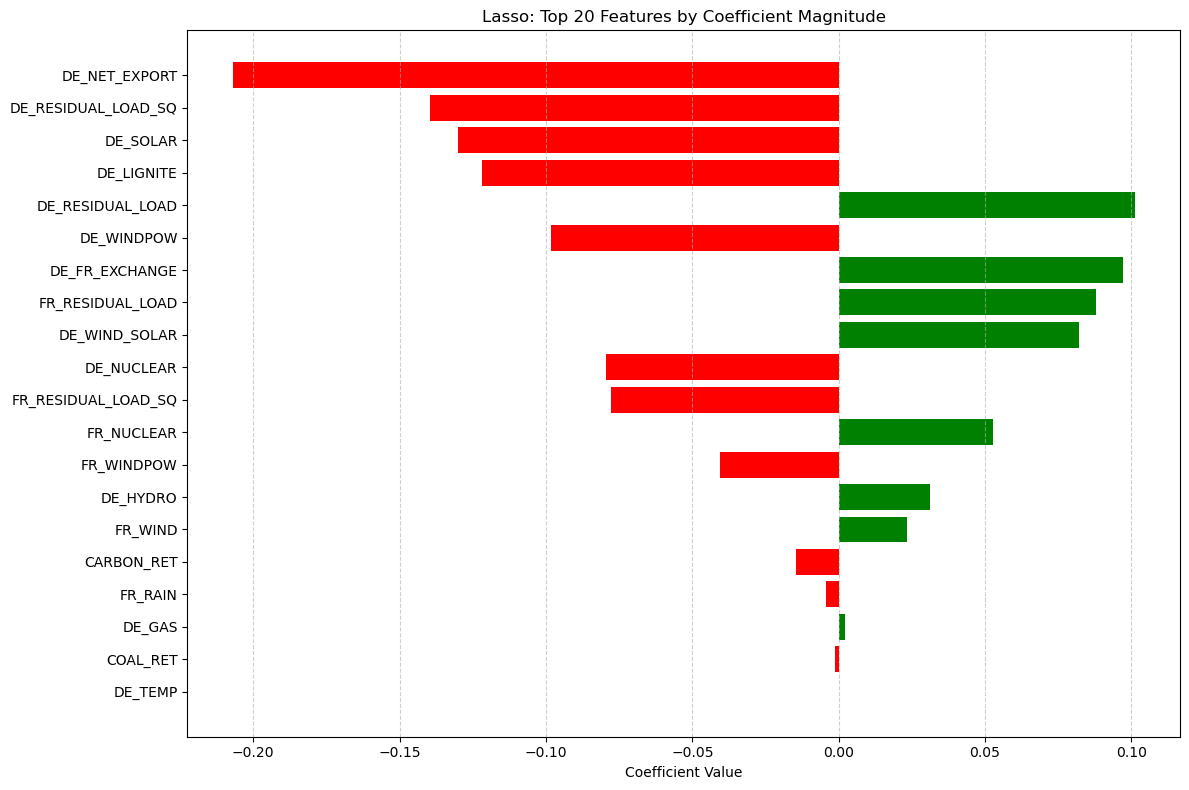

Lasso selected 22 features out of 41
Selected features by Lasso:
                Feature   Coefficient
4         DE_NET_EXPORT -2.070591e-01
35  DE_RESIDUAL_LOAD_SQ -1.396204e-01
16             DE_SOLAR -1.301623e-01
20           DE_LIGNITE -1.218424e-01
21     DE_RESIDUAL_LOAD  1.011604e-01
18           DE_WINDPOW -9.830098e-02
2        DE_FR_EXCHANGE  9.713100e-02
22     FR_RESIDUAL_LOAD  8.771099e-02
33        DE_WIND_SOLAR  8.192162e-02
14           DE_NUCLEAR -7.946829e-02
36  FR_RESIDUAL_LOAD_SQ -7.778006e-02
15           FR_NUCLEAR  5.268963e-02
19           FR_WINDPOW -4.069320e-02
12             DE_HYDRO  3.112097e-02
26              FR_WIND  2.343997e-02
31           CARBON_RET -1.454912e-02
24              FR_RAIN -4.268246e-03
8                DE_GAS  1.975791e-03
30             COAL_RET -1.415275e-03
27              DE_TEMP  7.840178e-05
3        FR_DE_EXCHANGE -1.414455e-15
6         DE_NET_IMPORT  2.168647e-16


In [203]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import spearmanr
import numpy as np

import matplotlib.pyplot as plt



# Apply StandardScaler to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

# Define column names for the scaled data
feature_names = X_train_features.columns


# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# LASSO Regression with Grid Search
alphas_lasso = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]
param_grid_lasso = {'alpha': alphas_lasso}

lasso_grid = GridSearchCV(
    Lasso(max_iter=10000, random_state=1),
    param_grid_lasso,
    cv=kf,
    scoring=spearman_scorer
)
lasso_grid.fit(X_train_scaled, y_train)

print(f"Best Lasso alpha: {lasso_grid.best_params_['alpha']}")
print(f"Best Lasso cross-validation score: {lasso_grid.best_score_:.4f}")

# Ridge Regression with Grid Search
alphas_ridge = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid_ridge = {'alpha': alphas_ridge}

ridge_grid = GridSearchCV(
    Ridge(random_state=1),
    param_grid_ridge,
    cv=kf,
    scoring=spearman_scorer
)
ridge_grid.fit(X_train_scaled, y_train)

print(f"Best Ridge alpha: {ridge_grid.best_params_['alpha']}")
print(f"Best Ridge cross-validation score: {ridge_grid.best_score_:.4f}")

# Fit final Lasso model with best alpha
final_lasso = Lasso(alpha=lasso_grid.best_params_['alpha'], max_iter=10000, random_state=42)
final_lasso.fit(X_train_scaled, y_train)

# Get feature importance from Lasso coefficients
lasso_coef = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': final_lasso.coef_
}).sort_values('Coefficient', key=lambda x: abs(x), ascending=False)

# Plot Lasso coefficients (top 20 by magnitude)
plt.figure(figsize=(12, 8))
lasso_top20 = lasso_coef.head(20)
colors = ['green' if c > 0 else 'red' for c in lasso_top20['Coefficient']]
plt.barh(lasso_top20['Feature'], lasso_top20['Coefficient'], color=colors)
plt.title('Lasso: Top 20 Features by Coefficient Magnitude')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Count non-zero coefficients
n_selected = np.sum(final_lasso.coef_ != 0)
print(f"Lasso selected {n_selected} features out of {len(feature_names)}")

# Print features with non-zero coefficients
selected_features = lasso_coef[lasso_coef['Coefficient'] != 0]
print("Selected features by Lasso:")
print(selected_features)

# Light GBM


In [80]:

from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer



# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=1)


lgbm_model = LGBMRegressor(
    objective='regression',
    num_leaves=15,
    n_estimators=100,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    learning_rate=0.05,
    feature_fraction=0.6,
    bagging_fraction=0.8,
    bagging_freq=5,
    random_state=42
)

# Cross-validate the model using Spearman correlation
cv_scores = cross_val_score(
    lgbm_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

print("LightGBM Cross-validation scores (Spearman correlation):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

# Train the final model on the full training set
# final_lgbm_model = LGBMRegressor(
#     objective='regression',
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=4,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42
# )

# final_lgbm_model.fit(X_train_features, y_train)

# # Make predictions on test data
# lgbm_predictions = final_lgbm_model.predict(X_test_features)

# # Create submission dataframe
# lgbm_submission = pd.DataFrame({
#     'ID': X_test['ID'],
#     'TARGET': lgbm_predictions
# })

# Optional: Save submission to CSV
# lgbm_submission.to_csv('lightgbm_submission.csv', index=False)

# Feature importance
# plt.figure(figsize=(12, 8))
# lgbm_feature_importance = pd.DataFrame({
#     'Feature': X_train_features.columns,
#     'Importance': final_lgbm_model.feature_importances_
# }).sort_values('Importance', ascending=False)

# plt.barh(lgbm_feature_importance['Feature'], lgbm_feature_importance['Importance'])
# plt.xlabel('Importance')
# plt.title('LightGBM Feature Importance')
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()

LightGBM Cross-validation scores (Spearman correlation): [0.15816251 0.09785238 0.1374151  0.14516152 0.20542479]
Mean cross-validation score: 0.14880325885884055
Standard deviation of cross-validation scores: 0.034734817471437696


# Catboost

In [192]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


kf = KFold(n_splits=5, shuffle=True, random_state=1)



# Define CatBoost model
catboost_model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.01,
    depth=6,
    subsample=1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=False
)

# Cross-validate the model using Spearman correlation
cv_scores = cross_val_score(
    catboost_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

print("CatBoost Cross-validation scores (Spearman correlation):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())






CatBoost Cross-validation scores (Spearman correlation): [0.02286343 0.03632489 0.01708954 0.22719085 0.03163796]
Mean cross-validation score: 0.06702133178140737
Standard deviation of cross-validation scores: 0.08036371336050868


Hyperparameters tuning

In [ ]:
# Define parameter grid for CatBoost
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Create RandomizedSearchCV to find optimal parameters
search = RandomizedSearchCV(
    CatBoostRegressor(random_seed=42, verbose=False),
    param_grid,
    n_iter=20,  # Number of parameter settings sampled
    scoring=spearman_scorer,
    cv=kf,
    random_state=42,
    n_jobs=-1
)

# Fit the model
search.fit(X_train_features, y_train)

# Print best parameters and score
print("Best parameters found:")
print(search.best_params_)
print(f"Best cross-validation score: {search.best_score_:.4f}")

CatBoost Cross-validation scores (Spearman correlation): [0.19385266 0.1649393  0.19005858 0.16442237 0.1626317 ]
Mean cross-validation score: 0.17518092164585755
Standard deviation of cross-validation scores: 0.013770249092475682


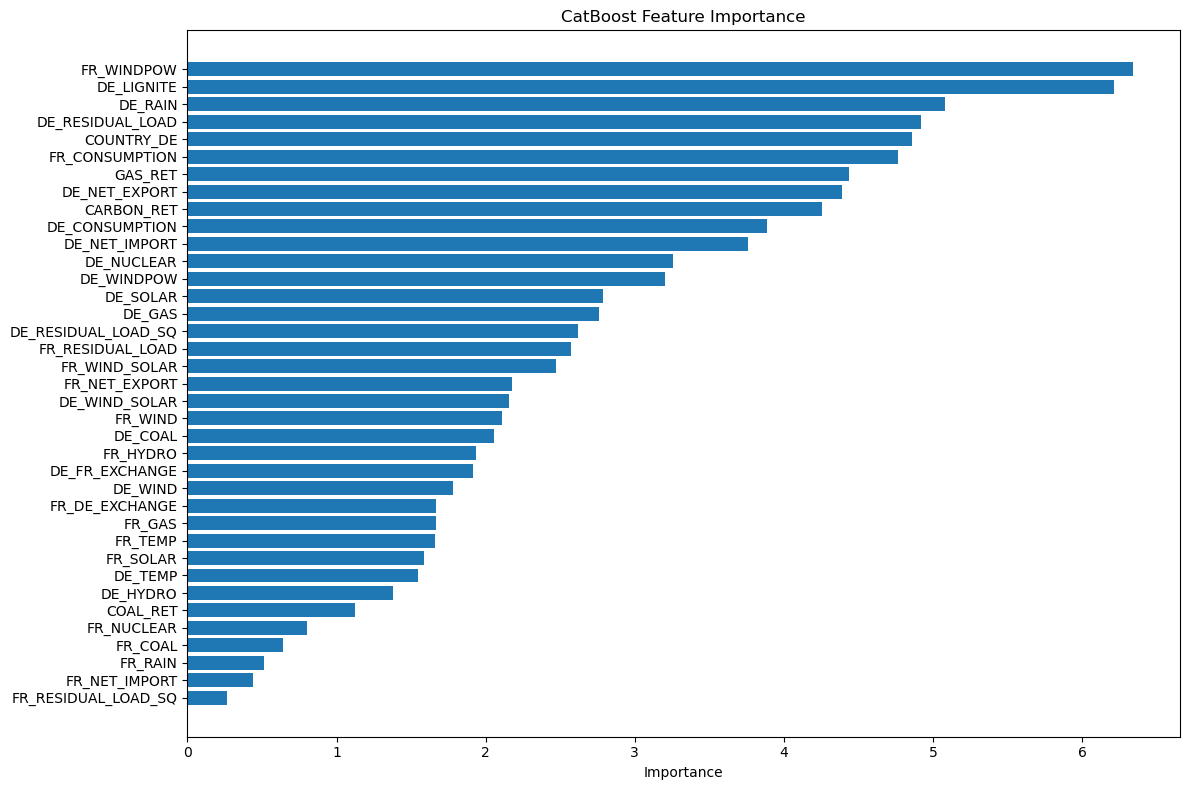

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


# Train the final model on the full training set
final_catboost_model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    subsample=0.8,
    random_seed=42,
    verbose=False
)

final_catboost_model.fit(X_train_features, y_train)

# Make predictions on test data
catboost_predictions = final_catboost_model.predict(X_test_features)

# Create submission dataframe
catboost_submission = pd.DataFrame({
    'ID': X_test['ID'],
    'TARGET': catboost_predictions
})

# Optional: Save submission to CSV
catboost_submission.to_csv('catboost_submission.csv', index=False)

# Feature importance
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': final_catboost_model.get_feature_importance()
}).sort_values('Importance', ascending=False)

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Random Forest

c:\Users\thoma\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest Cross-validation scores (Spearman correlation): [0.16134049 0.1075793  0.13581223 0.27753047 0.20242909]
Mean cross-validation score: 0.1769383146906725
Standard deviation of cross-validation scores: 0.05918425689399417


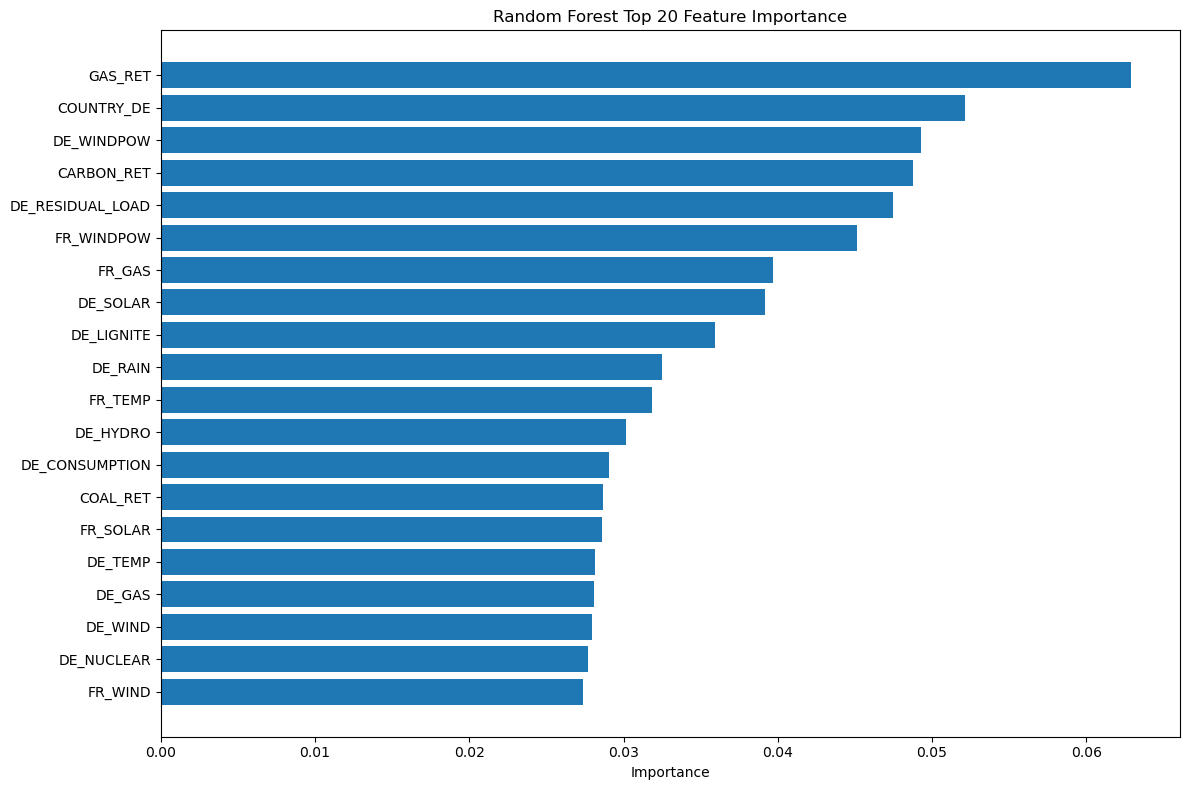

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import spearmanr


# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Cross-validate the model using Spearman correlation
cv_scores = cross_val_score(
    rf_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

print("Random Forest Cross-validation scores (Spearman correlation):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

# Train the final model on the full training set
final_rf_model = RandomForestRegressor(
    n_estimators=1000,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

final_rf_model.fit(X_train_features, y_train)

# Make predictions on test data
rf_predictions = final_rf_model.predict(X_test_features)

# Create submission dataframe
rf_submission = pd.DataFrame({
    'ID': X_test['ID'],
    'TARGET': rf_predictions
})

# Feature importance
plt.figure(figsize=(12, 8))
rf_feature_importance = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': final_rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.barh(rf_feature_importance['Feature'][:20], rf_feature_importance['Importance'][:20])
plt.xlabel('Importance')
plt.title('Random Forest Top 20 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Optional: Save submission to CSV
# rf_submission.to_csv('random_forest_submission.csv', index=False)

# Test features engineering

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor



kf = KFold(n_splits=5, shuffle=True, random_state=1)



# Define CatBoost model
catboost_model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.01,
    depth=6,
    subsample=1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=False
)

# Cross-validate the model using Spearman correlation
cv_scores = cross_val_score(
    catboost_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

# Define key variables important for electricity price prediction

# 1. Linear Regression using all features
lin_reg_all = LinearRegression()

lin_reg_all_scores = cross_val_score(
    lin_reg_all, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)



# 2. Using LightGBM with optimized parameters
lgbm_model_opt = LGBMRegressor(
    objective='regression',
    num_leaves=31,
    learning_rate=0.01,
    n_estimators=100,
    max_depth=8,
    subsample=0.8,
    random_state=42,
    verbose=-1
)

lgbm_scores = cross_val_score(
    lgbm_model_opt, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

# 3. Using XGBoost
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.01,
    max_depth=6,
    n_estimators=100,
    subsample=0.6,
    colsample_bytree=0.8,
    random_state=1
)

xgb_scores = cross_val_score(
    xgb_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

mean_scores = np.mean([lin_reg_all_scores.mean(), lgbm_scores.mean(), xgb_scores.mean(), cv_scores.mean()])


# Print performance metrics
print("\n=== MODEL PERFORMANCE ===")
print(f"Linear Regression (All Features) CV mean score: {lin_reg_all_scores.mean():.4f} ± {lin_reg_all_scores.std():.4f}")
print(f"LightGBM CV mean score: {np.mean(lgbm_scores):.4f} ± {np.std(lgbm_scores):.4f}")
print(f"XGBoost CV mean score: {np.mean(xgb_scores):.4f} ± {np.std(xgb_scores):.4f}")
print("Mean cross-validation score:", cv_scores.mean())

print("Mean cross-validation score for all models:", mean_scores)



=== MODEL PERFORMANCE ===
Linear Regression (All Features) CV mean score: 0.1745 ± 0.0259
LightGBM CV mean score: 0.1711 ± 0.0384
XGBoost CV mean score: 0.1852 ± 0.0409
Mean cross-validation score: 0.19956844756669484
Mean cross-validation score for all models: 0.1825890616116016


# TEst